# Manipulações básicas de imagem

Técnicas de manipulações básicas de imagem incluem:
- mudanças em valores de pixels individuais
- crop
- resize
- rotação de imagens


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
%matplotlib inline



Checkboard original da imagem

matriz relacionada com a imagem ==> 
 [[253 254 254 ... 253 254 253]
 [254 255 255 ... 255 255 253]
 [254 255 255 ... 254 255 253]
 ...
 [253 255 254 ... 254 255 253]
 [254 255 255 ... 255 255 254]
 [254 254 253 ... 254 254 254]]


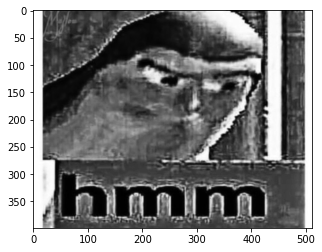

In [3]:
# lendo a imagem na escala cinza (grayscale)
meme = cv2.imread("./assets/imagem1.jpg", 0)
# setando color map para escala cinza para renderização
plt.imshow(meme, cmap='gray')
print("matriz relacionada com a imagem ==> \n", meme)

## Acessando pixels individualmente
Para acessar qualquer pixel em uma matriz numpy é preciso usar a notação matriz[l,c], onde l = linha do pixel, c = coluna do pixel. A matriz é indexada a partir de 0.

In [4]:
print("primeiro pixel ==> ", meme[0,0])
print("pixel na posição linha 20ª e 78ª coluna ==> ", meme[19, 77])

primeiro pixel ==>  253
pixel na posição linha 20ª e 78ª coluna ==>  96


## Modificando pixels
Podemos modificar a intensidade do valor do pixel.

copia modificada ===>
 [[253 254 254 ... 253 254 253]
 [254 100 100 ... 255 255 253]
 [254 255 255 ... 254 255 253]
 ...
 [253 255 254 ... 254 255 253]
 [254 255 255 ... 255 255 254]
 [254 254 253 ... 254 254 254]]


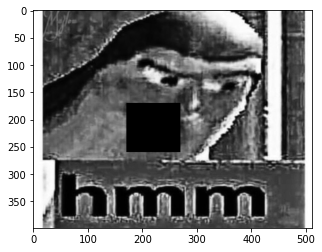

In [5]:
# modificando a intensidade do valor de pixel
meme_copy = meme.copy()
meme_copy[1, 1] = 100
meme_copy[1, 2] = 100
meme_copy[1, 3] = 100
meme_copy[1, 4] = 100
meme_copy[1, 5] = 100
meme_copy[1, 6] = 100
meme_copy[1, 7] = 100
meme_copy[1, 8] = 100

plt.imshow(meme_copy, cmap="gray")
print("copia modificada ===>\n", meme_copy)
meme_copy[170:260, 171:270] = 0
plt.imshow(meme_copy, cmap="gray")

## Cropping imagens
É uma forma simples de selecionar uma região específica da imagem.
A primeira coisa a se fazer é mudar os canais de cores.


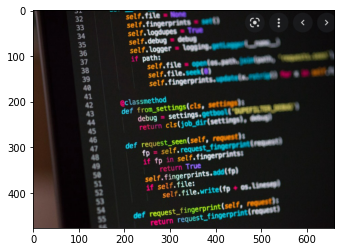

In [15]:
img2_bgr = cv2.imread("./assets/code.png", cv2.IMREAD_COLOR)
img2_rgb = img2_bgr[:,:,::- 1]
plt.imshow(img2_rgb)


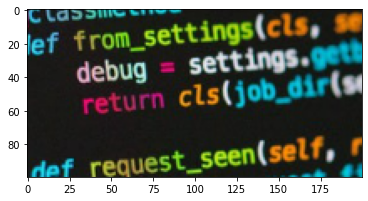

In [16]:
# Cortando a região do meio da imagem
regiao_cortada = img2_rgb[200:300, 200:400]
plt.imshow(regiao_cortada)

## Redimensionando a imagem
A função `resize` redimensiona a imagem `src` para um tamanho específico.
`dst = resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])`
`dst`: imagem de saída.

Requer dois argumentos:
- src:  imagem de input
- dsize: tamanho da imagem de saída


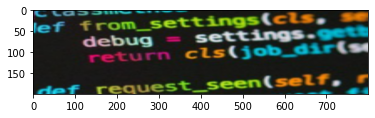

In [18]:
resized_cropped_region_2x = cv2.resize(regiao_cortada, None, fx=4, fy=2)
plt.imshow(resized_cropped_region_2x)

Outro método de redimensionamento. Especificando exatamente o tamanho da imagem de saída.


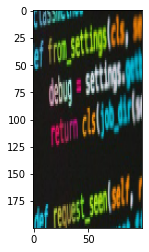

In [10]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

resized_cropped_region = cv2.resize(regiao_cortada, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### Redimensionando enquanto mantém o aspect ratio


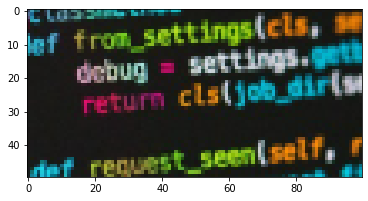

In [12]:
desired_width = 100
aspect_ratio = desired_width/regiao_cortada.shape[1]
desired_height = int(regiao_cortada.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)
resized_cropped_region = cv2.resize(regiao_cortada, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

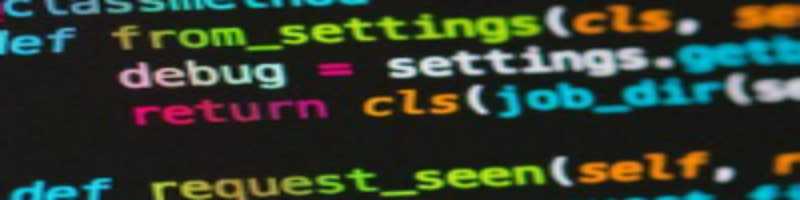

In [19]:
# Mudar a ordem do canal
resized_cropped_region_2x = resized_cropped_region_2x[:,:,::-1]
# salvar imagem redimensionada no disco
cv2.imwrite("./assets/resized_cropped_region_2x.png", resized_cropped_region_2x)
# Mostrar a imagem cortado e redimensionada
Image(filename="./assets/resized_cropped_region_2x.png")

## Rotação de imagem
A função `flip` rotaciona o array em uma de três diferentes direções (linhas e colunas são indexadas em 0).
Sintaxe:
`dst = cv2.flip(src, flipCode)`
A função requer dois argumentos:
- src = a imagem de entrada
- flipCode = uma flag que especifica como rotacionar o array, 0 significa rotacionar em torno de x e valor positivo significa rotacionar em torno de y. Valor negativo significa rotacionar em ambos os eixos.

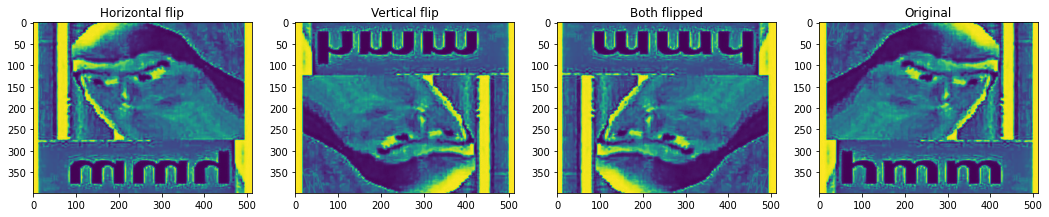

In [28]:
meme_flipped_horz = cv2.flip(meme, 1)
meme_flipped_vert = cv2.flip(meme, 0)
meme_flipped_both = cv2.flip(meme, -1)
plt.figure(figsize=[18,5])
plt.subplot(141); plt.imshow(meme_flipped_horz);plt.title("Horizontal flip");
plt.subplot(142); plt.imshow(meme_flipped_vert);plt.title("Vertical flip");
plt.subplot(143); plt.imshow(meme_flipped_both);plt.title("Both flipped");   
plt.subplot(144); plt.imshow(meme);plt.title("Original");